# This notebook is for geo data processing
geopandas has conflicts with anaconda, so install and use it in a virtual env called geoenv.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon, Point
from shapely import wkt
from shapely.geometry import *
import json

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

ImportError: DLL load failed while importing _datadir: The specified module could not be found.

In [2]:
fire_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Fire_Incidents_SF.csv'
df_fire = pd.read_csv(fire_file)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# fire data
df_fire.columns

Index(['Incident Number', 'Exposure Number', 'ID', 'Address', 'Incident Date',
       'Call Number', 'Alarm DtTm', 'Arrival DtTm', 'Close DtTm', 'City',
       'zipcode', 'Battalion', 'Station Area', 'Box', 'Suppression Units',
       'Suppression Personnel', 'EMS Units', 'EMS Personnel', 'Other Units',
       'Other Personnel', 'First Unit On Scene', 'Estimated Property Loss',
       'Estimated Contents Loss', 'Fire Fatalities', 'Fire Injuries',
       'Civilian Fatalities', 'Civilian Injuries', 'Number of Alarms',
       'Primary Situation', 'Mutual Aid', 'Action Taken Primary',
       'Action Taken Secondary', 'Action Taken Other',
       'Detector Alerted Occupants', 'Property Use', 'Area of Fire Origin',
       'Ignition Cause', 'Ignition Factor Primary',
       'Ignition Factor Secondary', 'Heat Source', 'Item First Ignited',
       'Human Factors Associated with Ignition', 'Structure Type',
       'Structure Status', 'Floor of Fire Origin', 'Fire Spread',
       'No Flame Spead'

In [4]:
# this is the primary situation: causes for fire. No null value here. very complete data
df_fire['Primary Situation'].nunique()

359

In [5]:
# based on others
structure_fire = ['111','112']
external_fire = ['140','141','142','143','151','152','153','154','155','160',\
            '161','162','164','170','173']

In [6]:
#searchfor = structure_fire + vehicle_fire + external_fire
df_external_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(external_fire))]

df_structure_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(structure_fire))]

In [7]:
df_external_fire['Primary Situation'].unique()

array(['142 - Brush, or brush and grass mixture fire',
       '151 - Outside rubbish, trash or waste fire',
       '140 - Natural vegetation fire, other',
       '154 - Dumpster/Outside trash receptacle fire',
       '160 - Special outside fire, other',
       '153 - Construction or demolition landfill fire',
       '152 - Garbage dump or sanitary landfill fire', '143 - Grass fire',
       '164 - Outside mailbox fire', '162 - Outside equipment fire',
       '161 - Outside storage fire',
       '141 - Forest, woods or wildland fire',
       '155 - Outside compactor/compacted trash fire',
       '173 - Cultivated trees or nursery stock fire',
       '170 - Cultivated vegetation, crop fire, other',
       '151 Outside rubbish, trash or waste fire',
       '142 Brush or brush-and-grass mixture fire',
       '140 Natural vegetation fire, other',
       '160 Special outside fire, other',
       '154 Dumpster or other outside trash receptacle fire',
       '164 Outside mailbox fire', '143 Gra

In [8]:
df_structure_fire['Primary Situation'].unique()

array(['111 - Building fire',
       '112 - Fires in struct. other than in a bldg.',
       '111 Building fire',
       '112 Fires in structure other than in a building'], dtype=object)

In [10]:
df_fire['Primary Situation'].unique()

array(['412 - Gas leak (natural gas or LPG)', '552 - Police matter',
       '210 - Steam Rupture, steam, other', '522 - Water or steam leak',
       '520 - Water problem, other',
       '733 - Smoke detector activation/malfunction',
       '711 - Municipal alarm system, Street Box False',
       '113 - Cooking fire, confined to container',
       '743 - Smoke detector, no fire, accidental',
       '551 - Assist PD or other Govern. Agency',
       '411 - Gasoline or other flammable liquid spill',
       '150 - Outside rubbish fire, other',
       '413 - Oil or other combustible liquid spill',
       '745 - Alarm system sounded/no fire-accidental',
       '118 - Trash or rubbish fire, contained', '442 - Overheated motor',
       '322 - Vehicle accident with injuries',
       '735 - Alarm system sounded due to malfunction',
       '554 - Assist invalid', '311 - Medical assist, assist EMS crew',
       '700 - False alarm or false call, other',
       '600 - Good intent call, other',
      

In [7]:
# create a df for internal fire.
internal_fire = ['412','210','522','520','113','411','444','653','445','730',\
                 '220','223','114','410','440','652','221','521','650','422',\
                 '213','671','200','441','443','423','420','431','251','371',\
                 '212','222','211','231','115','424','430','440','117','411',\
                 '531','412','210','651','445','200','413','114','451','443',\
                 '163','116','231','431']
df_internal_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(internal_fire))]
df_internal_fire.shape

# internal fire?
412 - Gas leak (natural gas or LPG)
210 - Steam Rupture, steam, other
522 - Water or steam leak
520 - Water problem, other
113 - Cooking fire, confined to container
411 - Gasoline or other flammable liquid spill
413 - Oil or other combustible liquid spill
444 - Power line down (wire)
653 - Barbecue, tar kettle'
445 - Arcing, shorted electrical equipment
730 - System malfunction, other
220 - Rupture from air or gas, other
223 - Air/gas rupture of pressure or process
114 - Chimney/flue fire, confined to chimney
410 - Flammable gas or liquid condition, other
440 - Elec. wiring/equip. problem, other
652 - Steam/vapor/fog/dust mistaken for smoke
221 - Rupture air or gas, pipe/pipline
521 - Water evacuation
650 - Steam/gas mistaken for smoke, other
422 - Chemical spill or leak(haz.)
213 - Steam rupture, pressure/process vessel
671 - Hazmat release investigation w/no hazmat
200 - Overpressure rupture/explosion, overheat
441 - Heat- short circuit, defect/worn wiring
443 - Light ballast breakdown
423 - Refrigeration leak
420 - Toxic condition, other (haz.)
431 - Radiation leak, radioactive material
251 - Excess heat, scorth burns with no ign
371 - Electrocution or potential electrocution
212 - Overpressure rupture of steam boiler
222 - Rupture of boiler from air or gas
211 - Steam Rupture, Pipe or pipeline
231 - Chem. reaction rupture of process vessel
115 - Incinerator overload/mal.,fire confined
424 - Carbon monoxide incident21
430 - Radioactive condition, other
440 Electrical  wiring/equipment problem, other
117 Commercial Compactor fire, confined to rubbish
411 Gasoline or other flammable liquid spill
444 Power line down
531 Smoke or odor removal
412 Gas leak (natural gas or LPG)
210 Overpressure rupture from steam, other
113 Cooking fire, confined to container
651 Smoke scare, odor of smoke
653 Smoke from barbecue, tar kettle
445 Arcing, shorted electrical equipment
441 Heat from short circuit (wiring), defective/worn
423 Refrigeration leak
222 Overpressure rupture of boiler from air or gas
410 Combustible/flammable gas/liquid condition, other
424 Carbon monoxide incident
200 Overpressure rupture, explosion, overheat other
413 Oil or other combustible liquid spill
114 Chimney or flue fire, confined to chimney or flue
420 Toxic condition, other
220 Overpressure rupture from air or gas, other
451 Biological hazard, confirmed or suspected
443 Breakdown of light ballast
213 Steam rupture of pressure or process vessel
163 Outside gas or vapor combustion explosion
116 Fuel burner/boiler malfunction, fire confined
231 Chemical reaction rupture of process vessel
431 Radiation leak, radioactive material
430 Radioactive condition, other

In [33]:
# see how many structural fire incidents
df_structure_fire.shape

(7636, 64)

In [10]:
df_external_fire.shape

(15518, 64)

In [34]:
# get the parcel file
parcel_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_parcel_lu/sf_parcel.geojson'
df_parcel = gpd.read_file(parcel_file)
print(df_parcel.head())

  yrbuilt from_st total_uses     shape_area cie   landuse  mips mapblklot  \
0    1912     838          0  3864.06176213   0  RESIDENT     0   0026013   
1    1900     844       3471   3361.0253507   0    MIXRES  3471   0026014   
2    1900     848          0  3272.03319647   0  RESIDENT     0   0026015   
3    1940     860          0  4570.76766739   0  RESIDENT     0   0026016   
4    1938     870          0  5225.82373482   0  RESIDENT     0   0026017   

  objectid     shape_leng  ... resunits pdr street retail to_st block_num  \
0        1  327.786363395  ...        5   0    BAY      0   842      0026   
1        2  320.352521518  ...        1   0    BAY      0   844      0026   
2        3  319.046088472  ...        2   0    BAY      0   850      0026   
3        4  279.353001525  ...        2   0    BAY      0   862      0026   
4        5   294.35433855  ...        2   0    BAY      0   872      0026   

    blklot lot_num med                                           geometry 

In [35]:
# in order to spatial join, only need id and geometry to keep it simple
df_parcel_simple = df_parcel[['objectid', 'geometry']]

In [36]:
# unit for EPSG:4326 is degree
df_parcel_simple.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [37]:
# check units
df_parcel_simple.crs.axis_info[0].unit_name 

'degree'

In [19]:
# the original gdf unit is in degree. Change it to meters using reprojection
#df_parcel_reproj = df_parcel_simple.to_crs({'init': 'epsg=3763'})
#df_parcel_reproj.crs.axis_info[0].unit_name 


or we can simply use this to convert since reproj works slowly.
1° = 111 km  (or 60 nautical miles)
0.1° = 11.1 km
0.01° = 1.11 km (2 decimals, km accuracy)
0.001° =111 m
0.0001° = 11.1 m
0.00001° = 1.11 m
0.000001° = 0.11 m (7 decimals, cm accuracy)

In [38]:
# create a buffer
gdf_parcel_buffer = df_parcel_simple
gdf_parcel_buffer.geometry = df_parcel_simple.geometry.buffer(0.0002) # unit is degree: 0.0003 is about 33 m or 100 feet

<ipython-input-38-e48a97972942>:3: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_parcel_buffer.geometry = df_parcel_simple.geometry.buffer(0.0002) # unit is degree: 0.0003 is about 33 m or 100 feet
C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [39]:
gdf_parcel_buffer.head()

,objectid,geometry
0,1,"POLYGON ((-122.42088 37.80481, -122.42088 37.8..."
1,2,"POLYGON ((-122.42098 37.80480, -122.42098 37.8..."
2,3,"POLYGON ((-122.42107 37.80479, -122.42107 37.8..."
3,4,"POLYGON ((-122.42115 37.80478, -122.42115 37.8..."
4,5,"POLYGON ((-122.42133 37.80476, -122.42133 37.8..."


In [14]:
from shapely import wkt

# Structure fire
let's start from structure fire, as it is most straight forward.

For structure fire, use 20m as buffer, as it would preserve 7572 out of 7636 incidents. And turn it into 38025 incidents associated with different buildings.
25757 buildins experienced structure fire from 2003-2020.

Would have to join year by year.

In [41]:
# see if any of the incidents features is useful
# if we are only counting incidents, then only incidents number and point are useful
df_structure = df_structure_fire[['Incident Number','Incident Date','point']]
df_structure['point'] = df_structure['point'].astype(str)
df_structure = df_structure.dropna() # axis = 'point'

# it seems that there is no null value, but instead, have a "nan" as a string
df_structure = df_structure[df_structure['point'] != 'nan']

<ipython-input-41-9b1c01bd8532>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_structure['point'] = df_structure['point'].astype(str)


In [42]:
df_structure['point'] = df_structure['point'].apply(wkt.loads)

In [43]:
# change the fire df into geo df
gdf_structure_fire = gpd.GeoDataFrame(df_structure, geometry='point')

# make sure the two dataset have the same projection

#gdf_fire = gdf_fire.to_crs({'init': 'epsg:4326'})
gdf_structure_fire.crs = df_parcel_simple.crs

# spatial join: using buffer
#structure_fire_sjoin = gpd.sjoin(gdf_structure_fire,gdf_parcel_buffer,how = 'left', op='within')
structure_fire_sjoin = gpd.sjoin(gdf_structure_fire,gdf_parcel_buffer,how = 'left', op='intersects')

In [44]:
# if we don't use buffer, and sjoin using within: we have 3340 fire incidents that canbe assosiated with a polygon
print(structure_fire_sjoin.shape)
# drop na
structure_fire_sjoin_not_null = structure_fire_sjoin.dropna()
print(structure_fire_sjoin_not_null.shape)

(38073, 5)
(38025, 5)


In [50]:
# check how many fire incidents remains: 20m~7572
structure_fire_sjoin_not_null['Incident Number'].nunique()

7572

In [45]:
# group by parcel id
grouped = structure_fire_sjoin_not_null.groupby('objectid').size()
df_group = grouped.to_frame().reset_index()
df_group.columns = ['objectid','fire_count']
df_group.shape

(25757, 2)

In [46]:
df_group.head()

,objectid,fire_count
0,1,1
1,10,2
2,100,1
3,100006,1
4,100025,1


In [47]:
# first convert gpd to pd
parcel = pd.DataFrame(df_parcel.drop(columns='geometry'))

# then merge using objectid
merged_data = parcel.merge(df_group, on='objectid', how='outer')

In [48]:
merged_data.head()

,yrbuilt,from_st,total_uses,shape_area,cie,landuse,mips,mapblklot,objectid,shape_leng,...,resunits,pdr,street,retail,to_st,block_num,blklot,lot_num,med,fire_count
0,1912,838,0,3864.06176213,0,RESIDENT,0,0026013,1,327.786363395,...,5,0,BAY,0,842,0026,0026013,013,0,1.0
1,1900,844,3471,3361.0253507,0,MIXRES,3471,0026014,2,320.352521518,...,1,0,BAY,0,844,0026,0026014,014,0,1.0
2,1900,848,0,3272.03319647,0,RESIDENT,0,0026015,3,319.046088472,...,2,0,BAY,0,850,0026,0026015,015,0,1.0
3,1940,860,0,4570.76766739,0,RESIDENT,0,0026016,4,279.353001525,...,2,0,BAY,0,862,0026,0026016,016,0,NaN
4,1938,870,0,5225.82373482,0,RESIDENT,0,0026017,5,294.35433855,...,2,0,BAY,0,872,0026,0026017,017,0,NaN


In [51]:
# replace nan with 0
merged_data['fire_count'] = merged_data['fire_count'].fillna(0)

In [52]:
merged_data['fire_count'].unique()

array([ 1.,  0.,  5.,  3.,  2.,  4.,  7.,  6.,  8., 10., 11., 14., 13.,
       12.,  9., 16., 17., 18., 15., 23., 19., 46., 42., 26., 29., 27.,
       21., 22.])

# inspection

see inspection data

In [53]:
inspection_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-inspections.csv'
df_inspect = pd.read_csv(inspection_file)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,7,11,15,16,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [54]:
df_inspect.columns

Index(['Inspection Number', 'Inspection Type', 'Inspection Type Description',
       'Inspection Status', 'Inspection Start Date', 'Inspection End Date',
       'Corrective Action Date', 'Return Date', 'Invoice Date',
       'Second Notice Date', 'Final Notice Date', 'Lien Date',
       'Sent to Bureau of Delinquent Revenue', 'Billable Inspection',
       'Address', 'ZIP Code', 'Referral Agency', 'Complaint Number',
       'Permit Number', 'Referral Number', 'Violation Number',
       'DBI Application Number', 'Invoice Amount', 'Fee', 'Penalty Amount',
       'Posting Fee', 'Interest Amount', 'Paid Amount', 'Paid Date',
       'Battalion', 'Station Area', 'Fire Prevention District',
       'Supervisor District', 'Analysis Neighborhood', 'point',
       'Neighborhoods (old)', 'Zip Codes', 'Fire Prevention Districts',
       'Police Districts', 'Supervisor Districts',
       'Central Market/Tenderloin Boundary',
       'Central Market/Tenderloin Boundary Polygon - Updated', 'Neighborhood

In [55]:
df_inspect['Inspection Type Description'].nunique()

78

In [56]:
# it seems that only complaints are useful
df_inspect['Inspection Type Description'].unique()
#  'Complaint Inspection'
# 'Violation Inspection - NOV'
# 

array(['Shared Spaces Program Insp.', 'Violation Inspection - NOV',
       'DBI Inspection', 'Permit Approval Inspection',
       'Initial Inspection', 'Port Annual Inspection',
       'Complaint Inspection', 'DPH Referral - Non HazMat Ref. Insp.',
       'Permit Annual Inspection', 'Follow Up Inspection',
       'Request for Fire Clearance Inspection', 'Traccess Installation',
       'Port Permits', 'DPH-CCSF-Mental Health',
       'School Annual Inspection', 'Police Dept. Ref. Insp.',
       'R2 Company Inspection', 'High Rise Annual Inspection',
       'On-Site Consultation', 'DSS-Community Care License',
       'Dept. of Corrections Ref. Insp.', 'Traccess Maintenance',
       'Hearing Reinspection', 'Order to Abate Reinspection',
       'Administrative Citation', 'RCF Inspection/Follow Up',
       'Facility Emergency Plan Review', nan, 'No Time Charged',
       'Place of Assembly Detail',
       'Additional Non-DBI Inspection/Plan Review Hours',
       'Public Education/Community O

In [102]:
df_inspect['Inspection Start Date'] = pd.to_datetime(df_inspect['Inspection Start Date'])

df_inspect['year'] = df_inspect['Inspection Start Date'].dt.year

df_inspect['year'].unique()

array([2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
       2009, 2008, 2007, 2006, 2005, 2004], dtype=int64)

# violation data

In [47]:
violation_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-violations.csv'
df_violate = pd.read_csv(violation_file)

In [60]:
df_violate.columns

Index(['Inspection Number', 'Violation Id', 'Address', 'Battalion',
       'Station Area', 'Fire Prevention District', 'Citation Number',
       'close date', 'corrective action', 'Status',
       'violation item description', 'violation date', 'violation number',
       'violation item', 'Primary', 'Zipcode', 'neighborhood district',
       'supervisor district', 'Location', 'Neighborhoods_from_fyvs_ahh9 2',
       'Supervisor Districts 2', 'Fire Prevention Districts 2',
       'Current Police Districts 2', 'Neighborhoods - Analysis Boundaries 2',
       'Zip Codes 2', 'Neighborhoods (old) 2', 'Police Districts 2',
       'Central Market/Tenderloin Boundary 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2',
       'Neighborhoods', 'SF Find Neighborhoods', 'Current Police Districts 3',
       'Current Supervisor Districts'],
      dtype='object')

In [61]:
# it seems that violations are just violations. So include them all, groupby time, location, etc
df_violate.shape

(30794, 33)

In [4]:
df_violate['violation date'] = pd.to_datetime(df_violate['violation date'])

df_violate['year'] = df_violate['violation date'].dt.year

In [5]:
df_violate['year'].unique()

array([2019, 2018, 2016, 2014, 2009, 2020, 2017, 2008, 2006, 2011, 2010,
       2007, 2012, 2015, 2005, 2013], dtype=int64)

In [7]:
df_test = df_violate[(df_violate['year'] == 2017)|(df_violate['year'] == 2018)]
df_test.shape

(9988, 34)

In [49]:
df_violate['Location']

0        {'type': 'Point', 'coordinates': [-122.4304867...
1        {'type': 'Point', 'coordinates': [-122.3867660...
2        {'type': 'Point', 'coordinates': [-122.3815924...
3        {'type': 'Point', 'coordinates': [-122.3867660...
4        {'type': 'Point', 'coordinates': [-122.3850329...
                               ...                        
30789    {'type': 'Point', 'coordinates': [-122.3990435...
30790    {'type': 'Point', 'coordinates': [-122.4706369...
30791    {'type': 'Point', 'coordinates': [-122.4194212...
30792    {'type': 'Point', 'coordinates': [-122.4030568...
30793    {'type': 'Point', 'coordinates': [-122.4149589...
Name: Location, Length: 30794, dtype: object

In [48]:
df_violate['Location'][1]

"{'type': 'Point', 'coordinates': [-122.38676600000001, 37.61795200002955]}"

In [51]:
asd = df_violate['Location'][1]
type(asd)

str

In [52]:
json.loads(asd.replace("\'", "\""))


{'type': 'Point', 'coordinates': [-122.38676600000001, 37.61795200002955]}

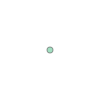

In [91]:
shape(json.loads(asd.replace("\'", "\"")))

In [81]:
from shapely.geometry import shape
from shapely.geometry import *
import json

In [53]:
#df_structure['point'] = df_structure['point'].apply(wkt.loads)

df_violate['Location'] = df_violate.apply(lambda row: shape(json.loads(row['Location'].replace("\'", "\""))), axis=1)
#df_violate['Location'] = df_violate.apply(lambda row: shape(row['Location']), axis=1)
#df_violate['Location'] = shape(df_violate['Location'])

In [54]:
df_violate['Location'] 

0         POINT (-122.4304867 37.72539873002963)
1          POINT (-122.386766 37.61795200002955)
2         POINT (-122.3815924 37.62390790002954)
3          POINT (-122.386766 37.61795200002955)
4          POINT (-122.385033 37.61779000002954)
                          ...                   
30789    POINT (-122.39904351 37.79299739002968)
30790    POINT (-122.47063695 37.70847297002962)
30791     POINT (-122.4194213 37.75415036002965)
30792    POINT (-122.40305689 37.79059199002965)
30793    POINT (-122.41495893 37.78315841002966)
Name: Location, Length: 30794, dtype: object

In [95]:
gdf_violate = gpd.GeoDataFrame(df_violate, geometry='Location')

# make sure the two dataset have the same projection
gdf_violate.crs = df_parcel_simple.crs

In [96]:
intersections = gpd.sjoin(gdf_parcel_buffer, gdf_violate, how="inner", op='contains')

In [98]:
intersections.head()

,objectid,geometry,index_right,Inspection Number,Violation Id,Address,Battalion,Station Area,Fire Prevention District,Citation Number,...,Zip Codes 2,Neighborhoods (old) 2,Police Districts 2,Central Market/Tenderloin Boundary 2,Central Market/Tenderloin Boundary Polygon - Updated 2,Neighborhoods,SF Find Neighborhoods,Current Police Districts 3,Current Supervisor Districts,year
1,2,"POLYGON ((-122.42098 37.80480, -122.42098 37.8...",20753,NaN,0612-0158976,869 North Point St,01,28,01W,NaN,...,28858,32.0,1.0,NaN,NaN,98.0,98.0,6.0,6.0,2006
2,3,"POLYGON ((-122.42107 37.80479, -122.42107 37.8...",20753,NaN,0612-0158976,869 North Point St,01,28,01W,NaN,...,28858,32.0,1.0,NaN,NaN,98.0,98.0,6.0,6.0,2006
17,18,"POLYGON ((-122.42169 37.80482, -122.42177 37.8...",20753,NaN,0612-0158976,869 North Point St,01,28,01W,NaN,...,28858,32.0,1.0,NaN,NaN,98.0,98.0,6.0,6.0,2006
18,19,"POLYGON ((-122.42123 37.80515, -122.42123 37.8...",20753,NaN,0612-0158976,869 North Point St,01,28,01W,NaN,...,28858,32.0,1.0,NaN,NaN,98.0,98.0,6.0,6.0,2006
19,20,"POLYGON ((-122.42114 37.80516, -122.42114 37.8...",20753,NaN,0612-0158976,869 North Point St,01,28,01W,NaN,...,28858,32.0,1.0,NaN,NaN,98.0,98.0,6.0,6.0,2006


In [99]:
intersections.shape

(111680, 36)

In [100]:
intersections['Inspection Number'].nunique()

8222

# building permit data

In [9]:
permit_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_building_permit/Building_Permits.csv'
df_permit = pd.read_csv(permit_file)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
df_permit.shape

(198900, 43)

In [11]:
df_permit.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [22]:
type(df_permit['Location'][0])

str

In [25]:
df_permit['Location'][0].strip('()')

'37.785719256680785, -122.40852313194863'

In [27]:
df_permit['Location'].str.strip('()')

0         37.785719256680785, -122.40852313194863
1          37.78733980600732, -122.41063199757738
2           37.7946573324287, -122.42232562979227
3          37.79595867909168, -122.41557405519474
4          37.78315261897309, -122.40950883997789
                           ...                   
198895                                        NaN
198896                                        NaN
198897                                        NaN
198898                                        NaN
198899                                        NaN
Name: Location, Length: 198900, dtype: object

In [14]:
df_permit['Permit Type'].unique()

array([4, 3, 8, 6, 7, 1, 5, 2], dtype=int64)

In [15]:
df_permit['Permit Type Definition'].unique()

array(['sign - erect', 'additions alterations or repairs',
       'otc alterations permit', 'demolitions', 'wall or painted sign',
       'new construction', 'grade or quarry or fill or excavate',
       'new construction wood frame'], dtype=object)

In [39]:
df_permit['Issued Date'] = pd.to_datetime(df_permit['Issued Date'])
df_permit['year'] = df_permit['Issued Date'].dt.year

In [42]:
df_permit['year'].unique()

array([2015., 2017.,   nan, 2014., 2016., 2018., 2013.])

In [28]:
# split location into lat, long
# first get rid of the ()
#df_permit['Location'] = df_permit['Location'].map(lambda x: x.strip('()'))
df_permit['Location'] = df_permit['Location'].str.strip('()')
df_permit[['lat','long']] = df_permit['Location'].str.split(', ',expand=True)

In [31]:
df_permit['lat'][0]

'37.785719256680785'

In [32]:
# change str to float
df_permit =  df_permit.dropna(subset=['lat','long'])

In [36]:
gdf_permit = gpd.GeoDataFrame(
    df_permit, geometry=gpd.points_from_xy(df_permit.long, df_permit.lat))

In [37]:
gdf_permit.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID,lat,long,geometry
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,NaN,NaN,3.0,Tenderloin,94102.0,"37.785719256680785, -122.40852313194863",1380611233945,37.785719256680785,-122.40852313194863,POINT (-122.40852 37.78572)
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,NaN,NaN,3.0,Tenderloin,94102.0,"37.78733980600732, -122.41063199757738",1420164406718,37.78733980600732,-122.41063199757738,POINT (-122.41063 37.78734)
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,constr type 1,NaN,3.0,Russian Hill,94109.0,"37.7946573324287, -122.42232562979227",1424856504716,37.7946573324287,-122.42232562979227,POINT (-122.42233 37.79466)
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,wood frame (5),NaN,3.0,Nob Hill,94109.0,"37.79595867909168, -122.41557405519474",1443574295566,37.79595867909168,-122.41557405519474,POINT (-122.41557 37.79596)
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,NaN,NaN,6.0,Tenderloin,94102.0,"37.78315261897309, -122.40950883997789",144548169992,37.78315261897309,-122.40950883997789,POINT (-122.40951 37.78315)


# crime data test

In [4]:
crime_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv'
df_crime = pd.read_csv(crime_file)

recent_crime_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Police_Department_Incident_Reports__2018_to_Present.csv'
df_recent_crime = pd.read_csv(recent_crime_file)

In [3]:
df_crime.columns

Index(['PdId', 'IncidntNum', 'Incident Code', 'Category', 'Descript',
       'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X',
       'Y', 'location', 'SF Find Neighborhoods 2 2',
       'Current Police Districts 2 2', 'Current Supervisor Districts 2 2',
       'Analysis Neighborhoods 2 2', 'DELETE - Fire Prevention Districts 2 2',
       'DELETE - Police Districts 2 2', 'DELETE - Supervisor Districts 2 2',
       'DELETE - Zip Codes 2 2', 'DELETE - Neighborhoods 2 2',
       'DELETE - 2017 Fix It Zones 2 2',
       'Civic Center Harm Reduction Project Boundary 2 2',
       'Fix It Zones as of 2017-11-06  2 2', 'DELETE - HSOC Zones 2 2',
       'Fix It Zones as of 2018-02-07 2 2',
       'CBD, BID and GBD Boundaries as of 2017 2 2',
       'Areas of Vulnerability, 2016 2 2',
       'Central Market/Tenderloin Boundary 2 2',
       'Central Market/Tenderloin Boundary Polygon - Updated 2 2',
       'HSOC Zones as of 2018-06-05 2 2', 'OWED Public Spaces 2 2',
       

In [5]:
df_recent_crime.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [6]:
df_crime['location'][0]

'POINT (-122.41982062806301 37.782008780606)'

In [10]:
df_recent_crime['point']

0                                              NaN
1                                              NaN
2                                              NaN
3         (37.75482657770952, -122.39772873392515)
4         (37.76653957529556, -122.42204381448558)
                            ...                   
385982    (37.78880754257507, -122.41188565874671)
385983    (37.79226261825945, -122.43620350896612)
385984    (37.78829319282882, -122.40840155198468)
385985    (37.74123427141981, -122.47449422499847)
385986    (37.78829319282882, -122.40840155198468)
Name: point, Length: 385987, dtype: object

# property tax data

In [12]:
tax_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Assessor_Historical_Property_Tax.csv'
df_tax = pd.read_csv(tax_file)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df_tax.head()

,Closed Roll Year,Property Location,Parcel Number,Block,Lot,Volume Number,Use Code,Use Definition,Property Class Code,Property Class Code Definition,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,DELETE - Supervisor Districts,DELETE - Fire Prevention Districts,DELETE - Current Police Districts,DELETE - Zip Codes,DELETE - Neighborhoods,DELETE - Police Districts
0,2007.0,0000 0000 0000,1378007,1378,007,10,MISC,Miscellaneous/Mixed-Use,V,Vacant Lot,...,2.0,8.0,4.0,29.0,2.0,11.0,9.0,55.0,26.0,6.0
1,2008.0,0000 0000 0000,1345001,1345,001,10,MISC,Miscellaneous/Mixed-Use,V,Vacant Lot,...,4.0,NaN,6.0,11.0,1.0,11.0,NaN,54.0,11.0,NaN
2,2008.0,0000 0000 0000,5607046,5607,046,33,MISC,Miscellaneous/Mixed-Use,V,Vacant Lot,...,83.0,9.0,2.0,25.0,7.0,10.0,4.0,28859.0,28.0,7.0
3,2009.0,0000 0297 BALTIMORE WY0000,6499040,6499,040,38,SRES,Single Family Residential,D,Dwelling,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28588.0,NaN,NaN
4,2010.0,0000 1715 SITUS TO BE ASSIGNEDST0000,0663054,0663,054,5,COMM,Commercial Misc,E,Schools,...,101.0,4.0,11.0,30.0,11.0,13.0,6.0,28858.0,27.0,9.0


In [15]:
df_tax.columns

Index(['Closed Roll Year', 'Property Location', 'Parcel Number', 'Block',
       'Lot', 'Volume Number', 'Use Code', 'Use Definition',
       'Property Class Code', 'Property Class Code Definition',
       'Year Property Built', 'Number of Bathrooms', 'Number of Bedrooms',
       'Number of Rooms', 'Number of Stories', 'Number of Units',
       'Zoning Code', 'Construction Type', 'Lot Depth', 'Lot Frontage',
       'Property Area', 'Basement Area', 'Lot Area', 'Lot Code',
       'Tax Rate Area Code', 'Percent of Ownership', 'Exemption Code',
       'Exemption Code Definition', 'Status Code', 'Misc Exemption Value',
       'Homeowner Exemption Value', 'Current Sales Date',
       'Assessed Fixtures Value', 'Assessed Improvement Value',
       'Assessed Land Value', 'Assessed Personal Property Value',
       'Assessor Neighborhood District', 'Assessor Neighborhood Code',
       'Assessor Neighborhood', 'Supervisor District', 'Analysis Neighborhood',
       'the_geom', 'Row ID', 'SF Find 

In [16]:
df_tax['the_geom'][0]

'(37.785130177493, -122.478111692066)'

In [17]:
df_tax['Closed Roll Year'].unique()

array([2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2017.,
         nan, 2016.])

# write function to process data
data assembly:
id, year, crime, occupancy, demographic, inspection, violation, fire incident last year, fire incident this year

df_parcel: gpd;

other df: pandas df

year: int

In [27]:
#parcel_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_parcel_lu/sf_parcel.geojson'
#df_parcel = gpd.read_file(parcel_file)
    
def process_fire(df_parcel, df_fire, year):
    
    # in order to spatial join, only need id and geometry to keep it simple
    df_parcel_simple = df_parcel[['objectid', 'geometry']]
    
    # create a buffer
    gdf_parcel_buffer = df_parcel_simple
    gdf_parcel_buffer.geometry = df_parcel_simple.geometry.buffer(0.0001) # unit is degree: 0.0003 is about 33 m or 100 feet
    
    # see if any of the incidents features is useful
    # if we are only counting incidents, then only incidents number,date and point are useful
    df_fire = df_fire[['Incident Number','Incident Date','point']]
    
    # select the year and previous year
    df_fire['Incident Date'] = pd.to_datetime(df_fire['Incident Date'])
    df_fire['year'] = df_fire['Incident Date'].dt.year
    # select this year and previous year
    df_fire = df_fire[(df_fire['year'] == year)|(df_fire['year'] == year-1)]
    
    df_fire['point'] = df_fire['point'].astype(str)
    df_fire = df_fire.dropna() # axis = 'point'

    # it seems that there is no null value, but instead, have a "nan" as a string
    df_fire = df_fire[df_fire['point'] != 'nan']
    df_fire['point'] = df_fire['point'].apply(wkt.loads)
    
    # change the fire df into geo df
    gdf_fire = gpd.GeoDataFrame(df_fire, geometry='point')

    # make sure the two dataset have the same projection
    gdf_fire.crs = df_parcel_simple.crs

    # divide the data into current year and previous year
    gdf_fire_current_year = gdf_fire[(gdf_fire['year'] == year)]
    gdf_fire_previous_year = gdf_fire[(gdf_fire['year'] == year-1)]
    
    ########################## current year
    # spatial join: using buffer
    fire_sjoin_current_year = gpd.sjoin(gdf_fire_current_year,gdf_parcel_buffer,how = 'left', op='within')

    # drop na
    fire_sjoin_current_year = fire_sjoin_current_year.dropna()
    # group by parcel id
    grouped_current_year = fire_sjoin_current_year.groupby('objectid').size()
    df_group_current_year = grouped_current_year.to_frame().reset_index()
    df_group_current_year.columns = ['objectid','fire_count']
    
    ###################### previous year
    # spatial join: using buffer
    fire_sjoin_previous_year = gpd.sjoin(gdf_fire_previous_year,gdf_parcel_buffer,how = 'left', op='within')

    # drop na
    fire_sjoin_previous_year = fire_sjoin_previous_year.dropna()
    # group by parcel id
    grouped_previous_year = fire_sjoin_previous_year.groupby('objectid').size()
    df_group_previous_year = grouped_previous_year.to_frame().reset_index()
    df_group_previous_year.columns = ['objectid','fire_count_last year']
    
    ######### join both
    # first convert gpd to pd
    parcel = pd.DataFrame(df_parcel.drop(columns='geometry'))

    # then merge using objectid
    merged_fire_data = parcel.merge(df_group_current_year, on='objectid', how='outer')
    merged_fire_data = merged_fire_data.merge(df_group_previous_year, on='objectid', how='outer')
    
    # replace nan with 0
    merged_fire_data['fire_count'] = merged_fire_data['fire_count'].fillna(0)
    merged_fire_data['fire_count_last year'] = merged_fire_data['fire_count_last year'].fillna(0)

    merged_fire_data['year'] = year 
    
    return merged_fire_data

In [9]:
parcel_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_parcel_lu/sf_parcel.geojson'
df_parcel = gpd.read_file(parcel_file)

fire_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Fire_Incidents_SF.csv'
df_fire = pd.read_csv(fire_file)

# based on others
structure_fire = ['111','112']

df_structure_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(structure_fire))]


C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
df_test = process_fire(df_parcel, df_structure_fire, 2017)

<ipython-input-16-f121519488f0>:11: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf_parcel_buffer.geometry = df_parcel_simple.geometry.buffer(0.0002) # unit is degree: 0.0003 is about 33 m or 100 feet
C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
<ipython-input-16-f121519488f0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [18]:
df_test.head()

,yrbuilt,from_st,total_uses,shape_area,cie,landuse,mips,mapblklot,objectid,shape_leng,...,street,retail,to_st,block_num,blklot,lot_num,med,fire_count,fire_count_last year,year
0,1912,838,0,3864.06176213,0,RESIDENT,0,0026013,1,327.786363395,...,BAY,0,842,0026,0026013,013,0,0.0,0.0,2017
1,1900,844,3471,3361.0253507,0,MIXRES,3471,0026014,2,320.352521518,...,BAY,0,844,0026,0026014,014,0,0.0,0.0,2017
2,1900,848,0,3272.03319647,0,RESIDENT,0,0026015,3,319.046088472,...,BAY,0,850,0026,0026015,015,0,0.0,0.0,2017
3,1940,860,0,4570.76766739,0,RESIDENT,0,0026016,4,279.353001525,...,BAY,0,862,0026,0026016,016,0,0.0,0.0,2017
4,1938,870,0,5225.82373482,0,RESIDENT,0,0026017,5,294.35433855,...,BAY,0,872,0026,0026017,017,0,0.0,0.0,2017


In [19]:
df_test['fire_count'].unique()

array([0., 1., 2., 3.])

# process inspection data

In [26]:
# select the types of inspection before inputing this function
def process_inspection(df_parcel, df_inspect, year):
    
    # in order to spatial join, only need id and geometry to keep it simple
    df_parcel_simple = df_parcel[['objectid', 'geometry']]
    
    # select 
    
    df_inspect['Inspection Start Date'] = pd.to_datetime(df_inspect['Inspection Start Date'])
    df_inspect['year'] = df_inspect['Inspection Start Date'].dt.year
    df_inspect = df_inspect[(df_inspect['year'] == year)]
    
    # this need to drop na in geometry fileds, otherwise it would fail
    df_inspect = df_inspect.dropna(subset=['point'])
    df_inspect['point'] = df_inspect.apply(lambda row: shape(json.loads(row['point'].replace("\'", "\""))), axis=1)
    gdf_inspect = gpd.GeoDataFrame(df_inspect, geometry='point')

    # make sure the two dataset have the same projection
    gdf_inspect.crs = df_parcel_simple.crs
    
    inspect_sjoin = gpd.sjoin(gdf_inspect, df_parcel_simple, how="inner", op='within')
    
    # dropnas
    inspect_sjoin = inspect_sjoin.dropna()
    
    # group by parcel id
    grouped = inspect_sjoin.groupby('objectid').size()
    df_group = grouped.to_frame().reset_index()
    df_group.columns = ['objectid','complaints_count']
    
    ##### join with parcel
    # first convert gpd to pd
    #parcel = pd.DataFrame(df_parcel.drop(columns='geometry'))

    # then merge using objectid
    #merged_inspect_data = parcel.merge(df_group, on='objectid', how='outer')
    
    # replace nan with 0
    #merged_inspect_data['complaints_count'] = merged_inspect_data['complaints_count'].fillna(0)

    return df_group

In [70]:
inspection_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-inspections.csv'
df_inspect = pd.read_csv(inspection_file)

#  'Complaint Inspection'
df_inspect = df_inspect[df_inspect['Inspection Type Description'] == 'Complaint Inspection']
# only includes a few columns 

df_inspect = df_inspect[['Inspection Start Date','point']].reset_index()

# the shapely shape command takes into exact format of strings, so need to drop NA because our string command is fixed
print(df_inspect.shape)
df_inspect = df_inspect.dropna(subset=['point'])
print(df_inspect.shape)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,7,11,15,16,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [72]:
df_test = process_inspection(df_parcel, df_inspect, 2017)
df_test.head()

<ipython-input-67-b051c55a2ca6>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inspect['point'] = df_inspect.apply(lambda row: shape(json.loads(row['point'].replace("\'", "\""))), axis=1)


,yrbuilt,from_st,total_uses,shape_area,cie,landuse,mips,mapblklot,objectid,shape_leng,...,resunits,pdr,street,retail,to_st,block_num,blklot,lot_num,med,complaints_count
0,1912,838,0,3864.06176213,0,RESIDENT,0,0026013,1,327.786363395,...,5,0,BAY,0,842,0026,0026013,013,0,0.0
1,1900,844,3471,3361.0253507,0,MIXRES,3471,0026014,2,320.352521518,...,1,0,BAY,0,844,0026,0026014,014,0,0.0
2,1900,848,0,3272.03319647,0,RESIDENT,0,0026015,3,319.046088472,...,2,0,BAY,0,850,0026,0026015,015,0,0.0
3,1940,860,0,4570.76766739,0,RESIDENT,0,0026016,4,279.353001525,...,2,0,BAY,0,862,0026,0026016,016,0,0.0
4,1938,870,0,5225.82373482,0,RESIDENT,0,0026017,5,294.35433855,...,2,0,BAY,0,872,0026,0026017,017,0,0.0


In [73]:
df_test['complaints_count'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  6., 11.,  5.,  7.,  9., 13.,  8., 12.])

In [74]:
df_test.shape

(155468, 23)

# process violation data

In [25]:
def process_violation(df_parcel, df_violate, year):
    
    # in order to spatial join, only need id and geometry to keep it simple
    df_parcel_simple = df_parcel[['objectid', 'geometry']]
    
    # select year 
    df_violate['violation date'] = pd.to_datetime(df_violate['violation date'])
    df_violate['year'] = df_violate['violation date'].dt.year
    df_violate = df_violate[(df_violate['year'] == year)]
    
    # this need to drop na in geometry fileds, otherwise it would fail
    df_violate = df_violate.dropna(subset=['Location'])
    df_violate['Location'] = df_violate.apply(lambda row: shape(json.loads(row['Location'].replace("\'", "\""))), axis=1)
    gdf_violate = gpd.GeoDataFrame(df_violate, geometry='Location')

    # make sure the two dataset have the same projection
    gdf_violate.crs = df_parcel_simple.crs
    
    violate_sjoin = gpd.sjoin(gdf_violate, df_parcel_simple, how="inner", op='within')
    
    # dropnas
    violate_sjoin = violate_sjoin.dropna()
    
    # group by parcel id
    grouped = violate_sjoin.groupby('objectid').size()
    df_group = grouped.to_frame().reset_index()
    df_group.columns = ['objectid','violation_count']
    
    ##### join with parcel
    # first convert gpd to pd
    #parcel = pd.DataFrame(df_parcel.drop(columns='geometry'))

    # then merge using objectid
    #merged_violation_data = parcel.merge(df_group, on='objectid', how='outer')
    
    # replace nan with 0
    #merged_violation_data['violation_count'] = merged_violation_data['violation_count'].fillna(0)
    
    
    
    return df_group

In [76]:
violation_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-violations.csv'
df_violate = pd.read_csv(violation_file)

In [78]:
df_test = process_violation(df_parcel, df_violate, 2017)
df_test.head()

,yrbuilt,from_st,total_uses,shape_area,cie,landuse,mips,mapblklot,objectid,shape_leng,...,resunits,pdr,street,retail,to_st,block_num,blklot,lot_num,med,violation_count
0,1912,838,0,3864.06176213,0,RESIDENT,0,0026013,1,327.786363395,...,5,0,BAY,0,842,0026,0026013,013,0,0.0
1,1900,844,3471,3361.0253507,0,MIXRES,3471,0026014,2,320.352521518,...,1,0,BAY,0,844,0026,0026014,014,0,0.0
2,1900,848,0,3272.03319647,0,RESIDENT,0,0026015,3,319.046088472,...,2,0,BAY,0,850,0026,0026015,015,0,0.0
3,1940,860,0,4570.76766739,0,RESIDENT,0,0026016,4,279.353001525,...,2,0,BAY,0,862,0026,0026016,016,0,0.0
4,1938,870,0,5225.82373482,0,RESIDENT,0,0026017,5,294.35433855,...,2,0,BAY,0,872,0026,0026017,017,0,0.0


In [79]:
df_test['violation_count'].unique()

array([0.])

# process building permit data

In [28]:
def process_permit(df_parcel, df_permit, year):
    
    # in order to spatial join, only need id and geometry to keep it simple
    df_parcel_simple = df_parcel[['objectid', 'geometry']]
    
    # select year 
    df_permit['Issued Date'] = pd.to_datetime(df_permit['Issued Date'])
    df_permit['year'] = df_permit['Issued Date'].dt.year
    df_permit = df_permit[(df_permit['year'] == year)]
    
    # this need to drop na in geometry fileds, otherwise it would fail
    df_permit = df_permit.dropna(subset=['lat','long'])
    gdf_permit = gpd.GeoDataFrame(df_permit, geometry=gpd.points_from_xy(df_permit.long, df_permit.lat))

    # make sure the two dataset have the same projection
    gdf_permit.crs = df_parcel_simple.crs
    
    permit_sjoin = gpd.sjoin(gdf_permit, df_parcel_simple, how="inner", op='within')
    
    # dropnas
    permit_sjoin = permit_sjoin.dropna()
    
    # group by parcel id
    grouped = permit_sjoin.groupby('objectid').size()
    df_group = grouped.to_frame().reset_index()
    df_group.columns = ['objectid','building_permit']
    

    return df_group

# property tax data

In [ ]:
def process_crime(df_parcel, df_crime, year):
    
    return crime_data

In [ ]:
def process_census(df_parcel, df_census, year):
    
    return census_data

# assemble the whole dataset

In [22]:
# load data

###################### Fire data
parcel_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_parcel_lu/sf_parcel.geojson'
df_parcel = gpd.read_file(parcel_file)

fire_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Fire_Incidents_SF.csv'
df_fire = pd.read_csv(fire_file)

# based on others
structure_fire = ['111','112']

df_structure_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(structure_fire))]

# create a df for internal fire.
internal_fire = ['412','210','522','520','113','411','444','653','445','730',\
                 '220','223','114','410','440','652','221','521','650','422',\
                 '213','671','200','441','443','423','420','431','251','371',\
                 '212','222','211','231','115','424','430','440','117','411',\
                 '531','412','210','651','445','200','413','114','451','443',\
                 '163','116','231','431']
df_internal_fire = df_fire[df_fire['Primary Situation'].str.contains('|'.join(internal_fire))]
df_internal_fire.shape

######################### inspection data
inspection_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-inspections.csv'
df_inspect = pd.read_csv(inspection_file)

#  'Complaint Inspection'
df_inspect = df_inspect[df_inspect['Inspection Type Description'] == 'Complaint Inspection']

#################### violation data
violation_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_fire_data/fire-violations.csv'
df_violate = pd.read_csv(violation_file)

################ permit data
permit_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_building_permit/Building_Permits.csv'
df_permit = pd.read_csv(permit_file)

df_permit['Location'] = df_permit['Location'].str.strip('()')
df_permit[['lat','long']] = df_permit['Location'].str.split(', ',expand=True)

C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (1,7,11,15,16,21,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\Ruoying\anaconda3\envs\geoenv\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [82]:
############################################# don't need to run this again
# check the year of each dataset
# seems that 2006 is the earliest for violation data
df_fire['Incident Date'] = pd.to_datetime(df_fire['Incident Date'])
df_fire['year'] = df_fire['Incident Date'].dt.year
print(df_fire['year'].unique())

df_inspect['Inspection Start Date'] = pd.to_datetime(df_inspect['Inspection Start Date'])
df_inspect['year'] = df_inspect['Inspection Start Date'].dt.year
print(df_inspect['year'].unique())

df_violate['violation date'] = pd.to_datetime(df_violate['violation date'])
df_violate['year'] = df_violate['violation date'].dt.year
print(df_violate['year'].unique())

[2008 2003 2004 2007 2005 2006 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020]
[2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2010 2009 2008 2007
 2006 2005 2004]
[2019 2018 2016 2014 2009 2020 2017 2008 2006 2011 2010 2007 2012 2015
 2005 2013]


In [29]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# initiate df
final_df = pd.DataFrame()

# so start from 2007, up to 2019
# permit data only 2013-2018

for year in range(2012,2020):
    
    building_fire = process_fire(df_parcel, df_internal_fire, year)

    inspect_result = process_inspection(df_parcel, df_inspect, year)
    violate_result = process_violation(df_parcel, df_violate, year)
    permit_result = process_permit(df_parcel, df_permit, year)
    
    # merge inspection, violation data to building/fire
    building_fire = building_fire.merge(inspect_result,on='objectid', how='outer')
    building_fire = building_fire.merge(violate_result,on='objectid', how='outer')
    building_fire = building_fire.merge(permit_result,on='objectid', how='outer')
    
    # replace nan with 0
    building_fire['complaints_count'] = building_fire['complaints_count'].fillna(0)
    building_fire['violation_count'] = building_fire['violation_count'].fillna(0)
    building_fire['building_permit'] = building_fire['building_permit'].fillna(0)
    
    final_df = pd.concat([final_df,building_fire])
    
    print(year, end =", ")


2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 

In [30]:
final_df.shape

(1243744, 28)

In [31]:
final_df.columns

Index(['yrbuilt', 'from_st', 'total_uses', 'shape_area', 'cie', 'landuse',
       'mips', 'mapblklot', 'objectid', 'shape_leng', 'visitor', 'st_type',
       'bldgsqft', 'resunits', 'pdr', 'street', 'retail', 'to_st', 'block_num',
       'blklot', 'lot_num', 'med', 'fire_count', 'fire_count_last year',
       'year', 'complaints_count', 'violation_count', 'building_permit'],
      dtype='object')

In [32]:
final_df.to_csv('third_analysis.csv', index=False)

# lastly: join parcel with block

In [33]:
parcel_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/SF_parcel_lu/sf_parcel.geojson'
df_parcel = gpd.read_file(parcel_file)

block_file = 'D:/Study/insight/project/fire_risk_prediction_SF/data/Census 2010_ Blocks for San Francisco.geojson'
df_block = gpd.read_file(block_file)

In [35]:
df_parcel_simple = df_parcel[['objectid', 'geometry']]

df_block['block_id'] = pd.to_numeric(df_block.geoid10, errors='coerce').astype(np.int64)
df_block_simple = df_block[['block_id', 'geometry']]

df_block_simple.crs = df_parcel_simple.crs

parcel_sjoin = gpd.sjoin(df_parcel_simple, df_block_simple, how="inner", op='intersects')

In [36]:
parcel_sjoin.head()

,objectid,geometry,index_right,block_id
0,1,"MULTIPOLYGON (((-122.42108 37.80478, -122.4211...",1999,60750102001011
1,2,"MULTIPOLYGON (((-122.42118 37.80476, -122.4212...",1999,60750102001011
2,3,"MULTIPOLYGON (((-122.42126 37.80475, -122.4213...",1999,60750102001011
3,4,"MULTIPOLYGON (((-122.42135 37.80474, -122.4215...",1999,60750102001011
4,5,"MULTIPOLYGON (((-122.42153 37.80472, -122.4217...",1999,60750102001011


In [39]:
parcel_sjoin.shape

(158633, 2)

In [38]:
parcel_sjoin = parcel_sjoin[['objectid','block_id']]
parcel_sjoin.to_csv('parcel_blk.csv', index=False)